**Pandas_And_Regression**

Written by William Lippard


In [0]:

import sklearn.datasets as datasets
from sklearn import metrics
from pandas import DataFrame, Series
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import *
from sklearn import preprocessing
from sklearn import utils
from matplotlib.pyplot import *
import numpy as np


In [0]:
def zscores(s):
  return (s - s.mean()) / s.std()

In [0]:
#Loading the boston house price data set
boston =  datasets.load_boston()
data = DataFrame(boston.data, columns=boston.feature_names)
normData = data.apply(zscores)
#normData.boxplot(rot=90)
y = boston.target.copy()
x = normData



In [0]:
#changing y to be either 1 or 0 if listing price is > 20, 1
y[y <= 20] = 0
y[y > 20] = 1

#splitting training and testing data
#xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=33)

#print(len(xTrain), len(yTrain))
#print(len(xTest), len(yTest))

Text(0, 0.5, 'Coefficient')

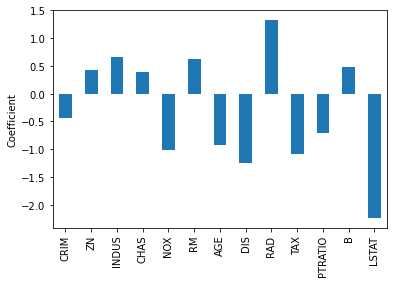

In [5]:
#creating a logistic regression model
logreg = LogisticRegression()
logreg.fit(x, y)


coefs = Series(logreg.coef_[0], boston.feature_names)
coefs.plot(kind='bar')
ylabel('Coefficient')

In [0]:
def trainPerf(clf, X, Y):
    print(' ------ training performance ------')
    pred = clf.predict(X)
    print('confusion matrix: \n', metrics.confusion_matrix(Y, pred))
    #print("accuracy: %.3f" % metrics.accuracy_score(Y, pred))
    print("kappa: %.3f " % metrics.cohen_kappa_score(Y, pred))
    print("Classification report: \n", metrics.classification_report(Y, pred))
    #score = clf.predict_proba(X)
    #auc=metrics.roc_auc_score(Y, score[:,1])
    #print("AUC: %.3f" % auc)

In [0]:
def crossValPer(clf, X, Y):
  print('------- cross-validation performance -------')
  kfold = ms.StratifiedKFold(n_splits=10, shuffle=True)
  pred = ms.cross_val_predict(clf, X, Y, cv=kfold)
  print('confusion matrix: \n', metrics.confusion_matrix(Y, pred))
  print("accuracy: %.3f" % metrics.accuracy_score(Y, pred))
  print("kappa: %.3f" % metrics.cohen_kappa_score(Y, pred))
  print("Classification report: \n", metrics.classification_report(Y, pred))

In [0]:
def crossValPerROC(clf, X, Y):
  # Cross-Validation performance
    #print('------- cross-validation performance -------')
    kfold = ms.StratifiedKFold(n_splits=10, shuffle=True)
    #pred = ms.cross_val_predict(clf, X, Y, cv=kfold)
    #print('confusion matrix: \n', metrics.confusion_matrix(Y, pred))
    #print("accuracy: %.3f" % metrics.accuracy_score(Y, pred))
    #print("kappa: %.3f" % metrics.cohen_kappa_score(Y, pred))
    #print("Classification report: \n", metrics.classification_report(Y, pred))
    score = ms.cross_val_predict(clf, X, Y, cv=kfold, method='predict_proba')
    auc=metrics.roc_auc_score(Y, score[:,1])
    roc=metrics.roc_curve(Y, score[:, 1])
    #print("AUC: %.3f" % auc)
    plot(roc[0], roc[1])
    xlabel('FPR')
    ylabel('TPR')
    title('ROC curve')
    text(.6, .2, 'AUC = %.3f' %auc, fontsize=12)
    show()

In [9]:
#3.ii
trainPerf(logreg, x, y)

 ------ training performance ------
confusion matrix: 
 [[183  32]
 [ 25 266]]
kappa: 0.769 
Classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       215
         1.0       0.89      0.91      0.90       291

    accuracy                           0.89       506
   macro avg       0.89      0.88      0.88       506
weighted avg       0.89      0.89      0.89       506



In [10]:
#3.iii
crossValPer(logreg, x, y)

------- cross-validation performance -------
confusion matrix: 
 [[180  35]
 [ 27 264]]
accuracy: 0.877
kappa: 0.748
Classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       215
         1.0       0.88      0.91      0.89       291

    accuracy                           0.88       506
   macro avg       0.88      0.87      0.87       506
weighted avg       0.88      0.88      0.88       506



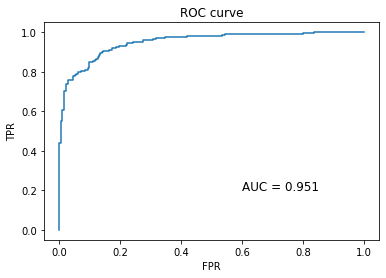

In [11]:
#3.iV
crossValPerROC(logreg, x, y)

In [0]:
y = boston.target.copy()
x = normData

#print(y)
#changing y to be either 1 or 0 if listing price is > 20, 1
y[y <= 40] = 0
y[y > 40] = 1

#splitting training and testing data
#xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=33)


In [13]:
#creating a logistic regression model
logreg2 = LogisticRegression()
logreg2.fit(x, y)

crossValPer(logreg2, x, y)


------- cross-validation performance -------
confusion matrix: 
 [[473   2]
 [ 12  19]]
accuracy: 0.972
kappa: 0.717
Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       475
         1.0       0.90      0.61      0.73        31

    accuracy                           0.97       506
   macro avg       0.94      0.80      0.86       506
weighted avg       0.97      0.97      0.97       506



The accuracy is higher than the previous mode after changing the y values, along with a lower kappa value indicating that our classifier is not as useful as the threshold, and the accuracy is high due to more chance. In the previous threshold of 20 the kappa of was greater than 40 and an accuacy was a little lower which tells us that the classifer is more useful and not as subject to chance. 

0.8938095238095238

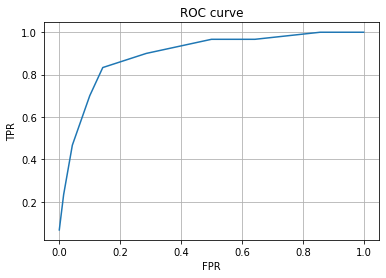

In [14]:
#part 1

score = np.linspace(.95, .05, 10)
pos = [2, 5, 7, 7, 4, 2, 2, 0, 1, 0]
neg = [0, 1, 2, 4, 3, 10, 15, 10, 15, 10]
tp = np.cumsum(pos)
fp = np.cumsum(neg)
tpr = tp/30
fpr = fp/70

plot(fpr, tpr)
xlabel('FPR')
ylabel('TPR')
title('ROC curve')
grid()

np.diff(fpr).dot(tpr[1:]+tpr[:-1])/2

In [0]:
# Part 4
#loading data
can = datasets.load_breast_cancer()
cData = DataFrame(can.data, columns=can.feature_names)

yC = can.target.copy()
xC = cData



[Text(167.4, 181.2, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(83.7, 108.72, 'X[27] <= 0.133\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(41.85, 36.23999999999998, 'gini = 0.03\nsamples = 329\nvalue = [5, 324]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(251.10000000000002, 108.72, 'X[27] <= 0.153\ngini = 0.109\nsamples = 190\nvalue = [179, 11]'),
 Text(209.25, 36.23999999999998, 'gini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 140\nvalue = [140, 0]')]

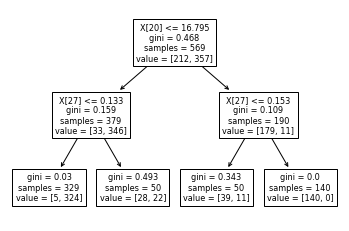

In [16]:
#4.a.i
dtCan = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)
dtCan.fit(xC, yC)

plot_tree(dtCan)


In [17]:
#4.a.ii
trainPerf(dtCan, xC, yC)


 ------ training performance ------
confusion matrix: 
 [[207   5]
 [ 33 324]]
kappa: 0.861 
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       212
           1       0.98      0.91      0.94       357

    accuracy                           0.93       569
   macro avg       0.92      0.94      0.93       569
weighted avg       0.94      0.93      0.93       569



The confusion matrix indicates that there is 207 TP, 5 FP, along with 33 FN, and 324 TN, these numbers start from the top and are dispersed throughout the tree depending on the true and false statement. The value attributres signals how many were true, assume the right value, and were false, assume the left value. Then all the leaf nodes were added up by each category (TP, FP, FN, TN) giving us the numbers in the confusion matrix.

In [18]:
#4.a.iii
crossValPer(dtCan, xC, yC)

------- cross-validation performance -------
confusion matrix: 
 [[191  21]
 [ 36 321]]
accuracy: 0.900
kappa: 0.789
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       212
           1       0.94      0.90      0.92       357

    accuracy                           0.90       569
   macro avg       0.89      0.90      0.89       569
weighted avg       0.90      0.90      0.90       569

